* Dataset can be found at [Pima Indians Diabetes Database
](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* More about K-Means clustering at [Pocket Algorithm](https://www.codeproject.com/Articles/1229772/Machine-Learning-Basics-Pocket-Learning-Algorithm)

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# What does the dataset contain ? 

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# What is the algorithm

# How does it work

# Advantages and Disadvantges of the algorithm

# How is it performed on the dataset 

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df['Outcome'].replace({0: -1}, inplace=True)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [9]:
X_train.shape

(537, 8)

In [10]:
learningRate = 0.01
oneVector = np.ones((X_train.shape[0], 1))
print (X_train.shape)
print(y_train.shape)

(537, 8)
(537,)


In [11]:
def pocket_algo(X, y, iterations=70):
    plotData = []
    weights = np.random.rand(X.shape[1], 1)
    weights_pocket = None
    misClassifications = 1
    minMisclassifications = X.shape[0]
    iteration = 0
    while (misClassifications != 0 and (iteration < iterations)):
        iteration += 1
        misClassifications = 0
        for i in range(0, len(X)):
            currentX = X[i].reshape(-1, X.shape[1])
            currentY = y[i]
            wTx = np.dot(currentX, weights)[0][0]
            if currentY == 1 and wTx < 0:
                misClassifications += 1
                weights = weights + learningRate * np.transpose(currentX)
            elif currentY == -1 and wTx > 0:
                misClassifications += 1
                weights = weights - learningRate * np.transpose(currentX)
        plotData.append(misClassifications)

        if misClassifications < minMisclassifications:
            minMisclassifications = misClassifications
            weights_pocket = weights
#         print("Iteration {}, Misclassifications {}".format(iteration, misClassifications))
    print ("Minimum Misclassifications : ", minMisclassifications)
    return weights_pocket, plotData, minMisclassifications

In [12]:
num_iterations = 70
weights, plotData, minMisclassifications = pocket_algo(X_train, y_train, iterations=num_iterations)

Minimum Misclassifications :  214


Best Case Accuracy of Pocket Learning Algorithm: 60.149 %


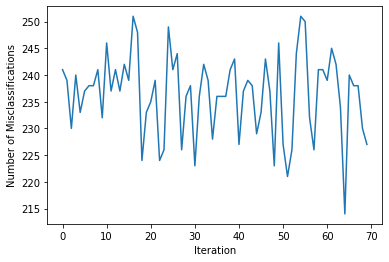

In [13]:
print ("Best Case Accuracy of Pocket Learning Algorithm: {:.3f} %".format
       (((X_train.shape[0] - minMisclassifications)/X_train.shape[0])*100))
plt.plot(np.arange(0, num_iterations), plotData)
plt.xlabel("Iteration")
plt.ylabel("Number of Misclassifications")
plt.show()

# Summary

* Pocket algorithm is one of the simplest and fastest algorithms
* But the model in itself is not very reliable
* The model can not generalize the data and results in low accuracy
* Pocket algorithm is good for smaller datasets